### ** Trees: Ensemble Methods - Bagging

Bagging: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data. (Summary!)

BAGGing stands for Bootstrapping (sampling with replacement) and AGGregating (Averaging predictions).

With Random Forest in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees. When you have many random trees. It’s called Random Forest.

With Random Forest, our goal is to reduce the variance of a decision Tree. We end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.

- forests = high variance, low bias base learners
- Bagging to decrease the model’s variance

<img src="./images/boostrap_aggregating.png" width="500" height="500" />

### <strong> Extremely Randomized Trees </strong>

Extremely Randomized Trees, abbreviated as ExtraTrees in Sklearn, adds one more step of randomization to the random forest algorithm. 

Random forests will 

1. compute the optimal split to make for each feature within the randomly selected subset, and it will then choose the best feature to split on. 
2. builds multiple trees with bootstrap = True (by default), which means it samples replacement.

ExtraTrees on the other hand(compared to Random Forests) will instead choose a random split to make for each feature within that random subset, and it will subsequently choose the best feature to split on by comparing those randomly chosen splits. (nodes are split on random splits, not best splits.)

Like random forest, the Extra Trees algorithm will randomly sample the features at each split point of a decision tree. Unlike random forest, which uses a greedy algorithm to select an optimal split point, the Extra Trees algorithm selects a split point at random.

In terms of computational cost, and therefore execution time, the Extra Trees algorithm is faster. This algorithm saves time because the whole procedure is the same, but it randomly chooses the split point and does not calculate the optimal one.

Extremely randomized trees are much more computationally efficient than random forests, and their performance is almost always comparable. In some cases, they may even perform better!

![Bagging](./images/rf_extra.png)

Link to Paper: https://link.springer.com/content/pdf/10.1007/s10994-006-6226-1.pdf

In [1]:
#import libraries
import pandas as pd
import numpy as numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score

In [2]:
#load dataset

X,y = load_iris(return_X_y=True)

#train,test split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

#random forest with gini
rf = RandomForestClassifier(criterion='gini', n_estimators=150, max_depth=4, n_jobs=-1)
rf.fit(X_train, y_train)  #fit on the data
rf_predict = rf.predict(X_test)
f1_score(y_test, rf_predict, average=None)

array([1., 1., 1.])

In [3]:
#random forest with entropy
rf = RandomForestClassifier(criterion='entropy', n_estimators=200, max_depth=4, n_jobs=-1)

rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

f1_score(y_test, rf_predict, average=None)

array([1., 1., 1.])

Exercise: Using the data in scout_data, build a model to predict a product tier(Classification) and a model to predict the number of detail views.(Regression)

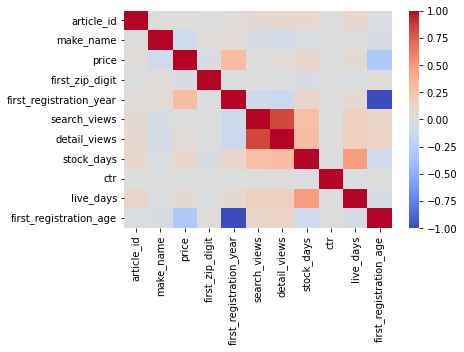

In [10]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import seaborn as sns
df = pd.read_csv("./data/scout_data/carsearch_cleaned.csv")
#one hot encoding for Foreign/Local Used column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  #instantiate the Label Encoder
df['product_tier'] = le.fit_transform(df['product_tier'])
df['make_name'] = le.fit_transform(df['make_name'])

df = df.drop("created_date", axis=1)
df = df.drop("deleted_date", axis=1)

#Y is the target
Y = df["product_tier"]
X = df.drop("product_tier", axis=1)
cor_matrix = X.corr()
sns.heatmap(cor_matrix, annot=False, cmap = "coolwarm");

In [ ]:
n_estimators = 1000
max_depth = 10
random_state = 42
criterion = "entropy"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=random_state,
    oob_score=True,
    criterion=criterion)
model.fit(X_train,Y_train);

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, mean_absolute_error

Y_pred = model.predict(X_test)
Y_train_proba = model.predict_proba(X_train)[:, 1] # Probability of positive class
Y_test_proba = model.predict_proba(X_test)[:, 1] # Probability of positive class
f1 = f1_score(Y_test, Y_pred, average='micro')

#Print the evaluation metrics
print("F1-Score: {:.3f}".format(f1))

F1-Score: 0.971


# Regressor

In [19]:
from sklearn.metrics import mean_absolute_percentage_error

Y = df["detail_views"]
X = df.drop("detail_views", axis=1)

n_estimators = 1000
max_depth = 10
random_state = 42
criterion = "entropy"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)

model = RandomForestRegressor()
model.fit(X_train, Y_train)
mape = mean_absolute_percentage_error(Y_test, Y_pred) 
print("MAPE: {:.3f}".format(mape))

MAPE: 0.981
